In [1]:
##code is adapted from https://www.tensorflow.org/tutorials/images/classification 
##prepare data; 
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras as keras
import os
import numpy as np
import matplotlib.pyplot as plt
import PIL as PIL
#_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
#path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
#path_to_zip = "~/Documents/GitHub/deep_learning_exercises/"
path_to_zip = "./"
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

/Users/scotteckert/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
##setting the dir of the datasets; 
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

1000
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


NameError: name 'classes' is not defined

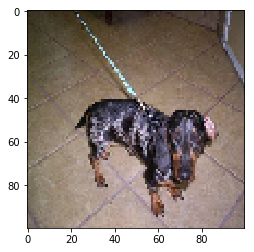

In [48]:
#take a peek at the data; 
print(len(os.listdir(train_cats_dir)))
#load images using ImageDataGenerator; 
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
batch_size = 1000
epochs = 15
IMG_HEIGHT = 100
IMG_WIDTH = 100
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')
validation_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')


def reformat_image(image):
    x,y = next(image)
    m = len(y)
    n_x = IMG_HEIGHT * IMG_WIDTH * 3
    X = np.ndarray((n_x,m),dtype=np.float32)
    for i in range(m):
        X[:,i] = np.squeeze(x[i].reshape((n_x,1)))
    return X,y

train_x, train_y = reformat_image(train_data_gen)
val_x, val_y = reformat_image(validation_data_gen)



In [37]:
##logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression()

clf.fit(train_x.T,train_y.T.ravel())

test_pred = clf.predict(val_x.T)
accuracy_score(val_y.T, test_pred)


0.758

0.8353738557070611


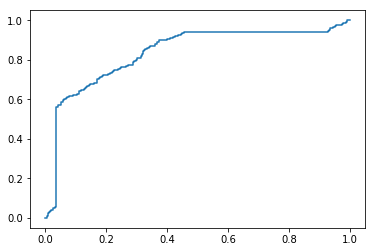

In [46]:
###linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

clf = LinearRegression()

clf.fit(train_x.T,train_y.T.ravel())

test_pred = clf.predict(val_x.T)
print(roc_auc_score(val_y.T.ravel(), test_pred))

fpr, tpr, _ = roc_curve(val_y.T.ravel(), test_pred)
plt.plot(fpr,tpr)


In [56]:
###SVM
from sklearn.svm import SVC


clf = SVC(kernel='sigmoid')
clf.fit(train_x.T, train_y.T)

test_pred = clf.predict(train_x.T)
accuracy_score(val_y.T,test_pred)



0.52